# EECS 731 Final Project - Clothing One
## Anomaly Detection

In [1]:
import pandas as pd
import numpy as np
import pickle

In [2]:
reviews = pickle.load(open("../Data/reviews.pkl", "rb" ))
rented_for_encoding = pickle.load(open("../Data/rented_for_encoding.pkl", "rb"))
body_type_encoding = pickle.load(open("../Data/body_type_encoding.pkl", "rb"))
category_encoding = pickle.load(open("../Data/category_encoding.pkl", "rb"))

In [3]:
old_size = len(reviews)
reviews
#static rule remove all products with less than 100 reviews
reviews = reviews.loc[reviews['age'].apply(lambda a :a > 12 and a < 80)]
number_removed = old_size - len(reviews)
number_removed

111

In [4]:
old_size = len(reviews)
#static rule remove all products with less than 100 reviews
itemCounts = reviews['item_id'].value_counts()
reviews = reviews.loc[reviews['item_id'].apply(lambda p : itemCounts[p] >= 50)]
number_removed = old_size - len(reviews)
number_removed

67020

In [27]:
itemCounts.head()

126335    1526
123793    1354
174086    1273
127865    1115
145906    1110
Name: item_id, dtype: int64

In [5]:
len(reviews)

79250

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [7]:
# We want to first drop unrealist data like age 0 and age 117

# Also drop age < 14 since rent the runway started renting child size clothes in April 2019 which means none of the clothes should be targeted toward children
#, age > 75 since this is not the target demographic that makes up the bulk of orders meaning the bulk of returns

### Ⅰ. Univariate
-- Rules Applied: 3σ rule and boxplot

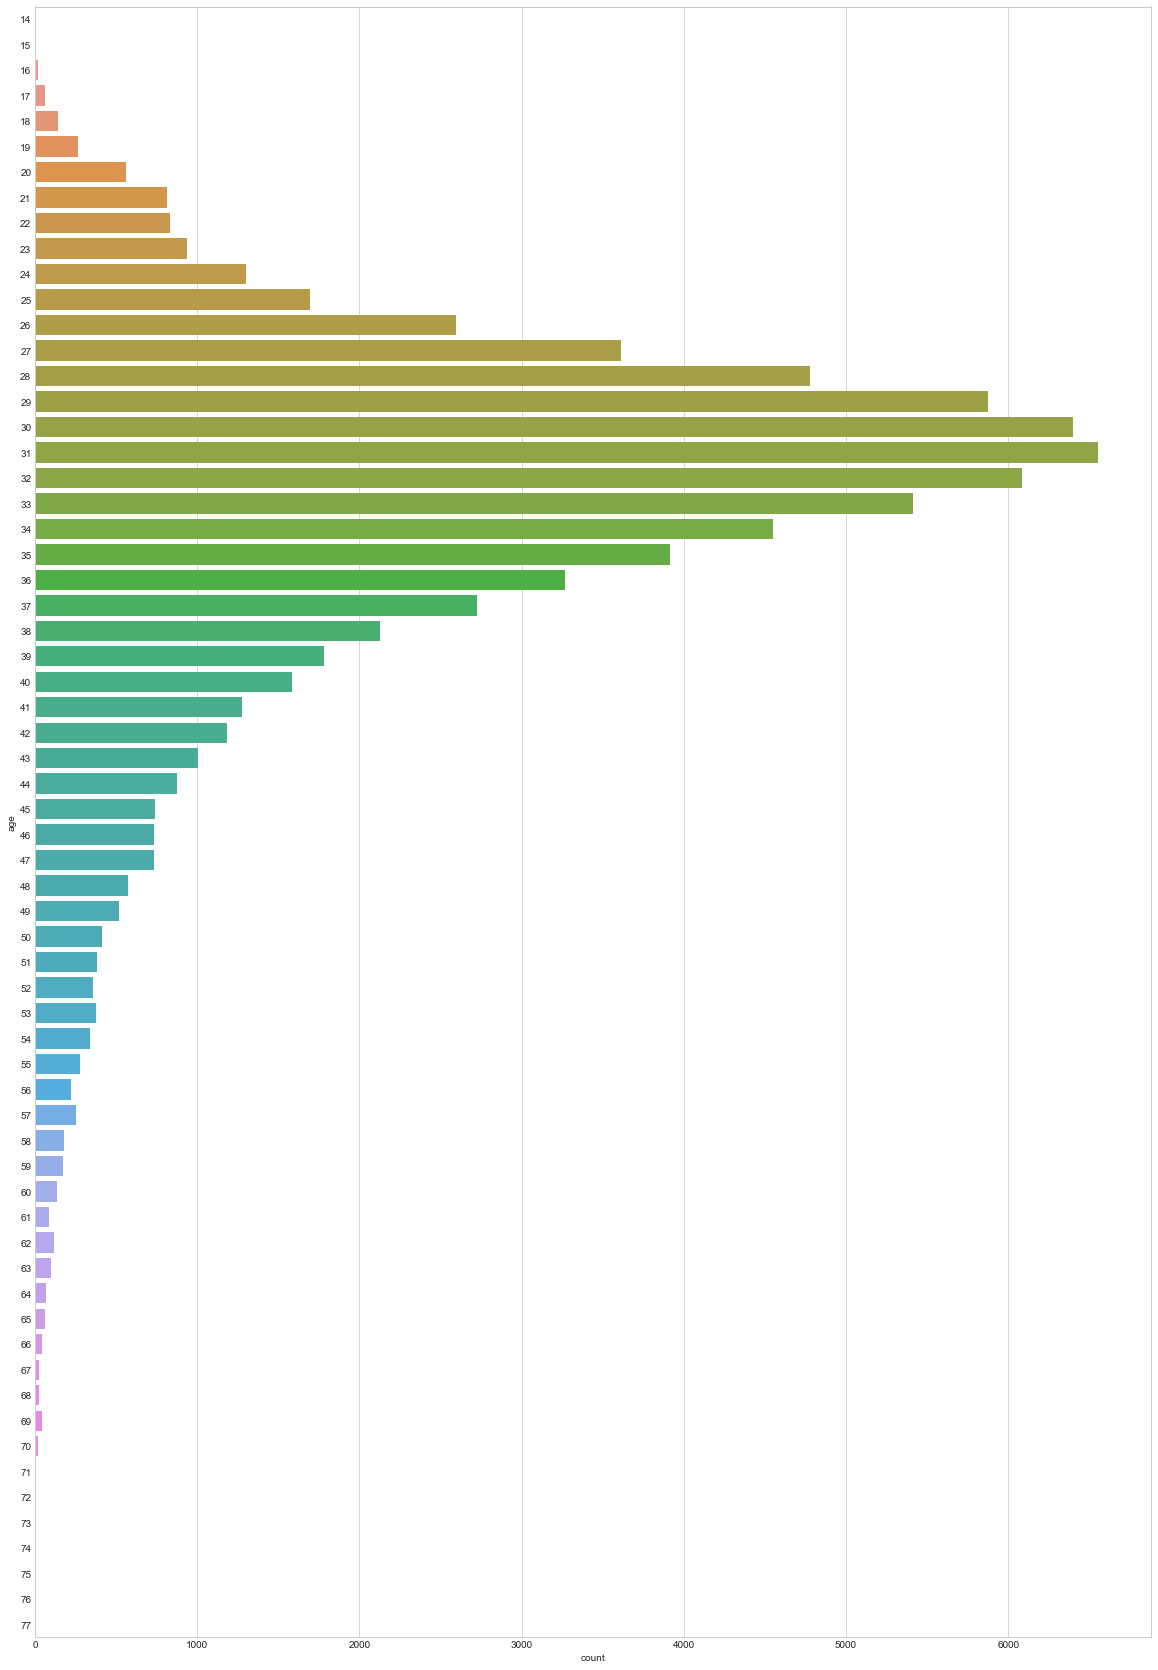

In [8]:
data_bin = pd.DataFrame()

data_bin['age'] = reviews['age']

plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize = (20, 30)) 
sns.countplot(y = "age", data = data_bin);

In [9]:
def three_sigma(Ser1):
    rule = (Ser1.mean()-3*Ser1.std()>Ser1) | (Ser1.mean()+3*Ser1.std()< Ser1)
    index = np.arange(Ser1.shape[0])[rule]
    outrange = Ser1.iloc[index]
    return outrange

data_anomaly_age = three_sigma(reviews['age'])
print("Count: ", data_anomaly_age.count())
print("Min: ", data_anomaly_age.min())
print("Max: ", data_anomaly_age.max())
print("Anomalies:")
data_anomaly_age

Count:  1349
Min:  57
Max:  77
Anomalies:


6         65
205       59
212       58
887       58
1327      62
          ..
145986    60
146030    72
146033    58
146109    69
146137    63
Name: age, Length: 1349, dtype: int64

In [10]:
reviews_age60 = reviews.loc[reviews['age'] < 60]
data_anomaly_age = three_sigma(reviews_age60['age'])
print("Count: ", data_anomaly_age.count())
print("Min: ", data_anomaly_age.min())
print("Max: ", data_anomaly_age.max())
print("Anomalies:")
data_anomaly_age

Count:  1102
Min:  55
Max:  59
Anomalies:


150       56
205       59
212       58
270       55
847       56
          ..
146033    58
146034    56
146125    56
146214    56
146283    55
Name: age, Length: 1102, dtype: int64

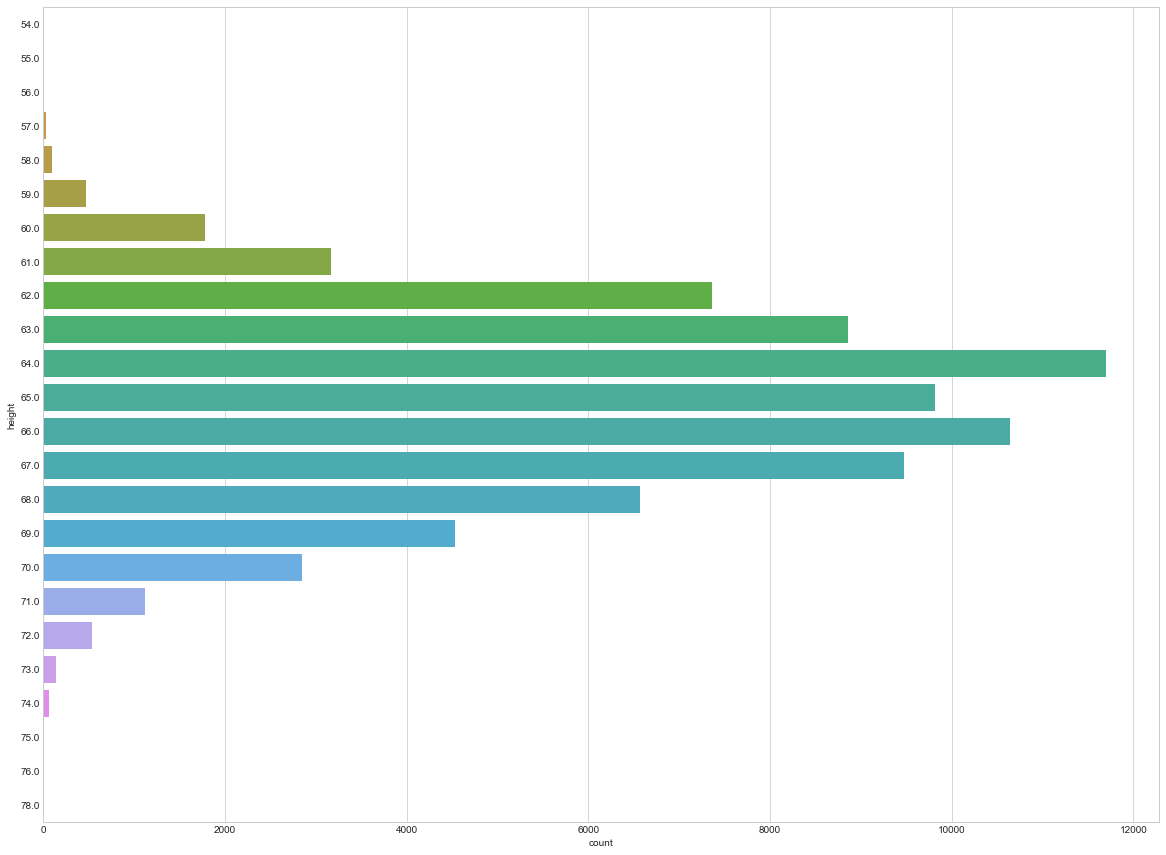

In [11]:
data_bin = pd.DataFrame()

data_bin['height'] = reviews['height']

plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize = (20, 15)) 
sns.countplot(y = "height", data = data_bin);

In [12]:
def three_sigma(Ser1):
    rule = (Ser1.mean()-3*Ser1.std()>Ser1) | (Ser1.mean()+3*Ser1.std()< Ser1)
    index = np.arange(Ser1.shape[0])[rule]
    outrange = Ser1.iloc[index]
    return outrange

data_anomaly_height = three_sigma(reviews['height'])
print("Count:", data_anomaly_height.count())
print("Min: ", data_anomaly_height.min())
print("Max: ", data_anomaly_height.max())
print("Anomalies:")
data_anomaly_height

Count: 146
Min:  54.0
Max:  78.0
Anomalies:


465       56.0
581       74.0
2859      56.0
3162      75.0
4704      56.0
          ... 
140295    74.0
141220    57.0
143416    57.0
145173    55.0
145779    75.0
Name: height, Length: 146, dtype: float64

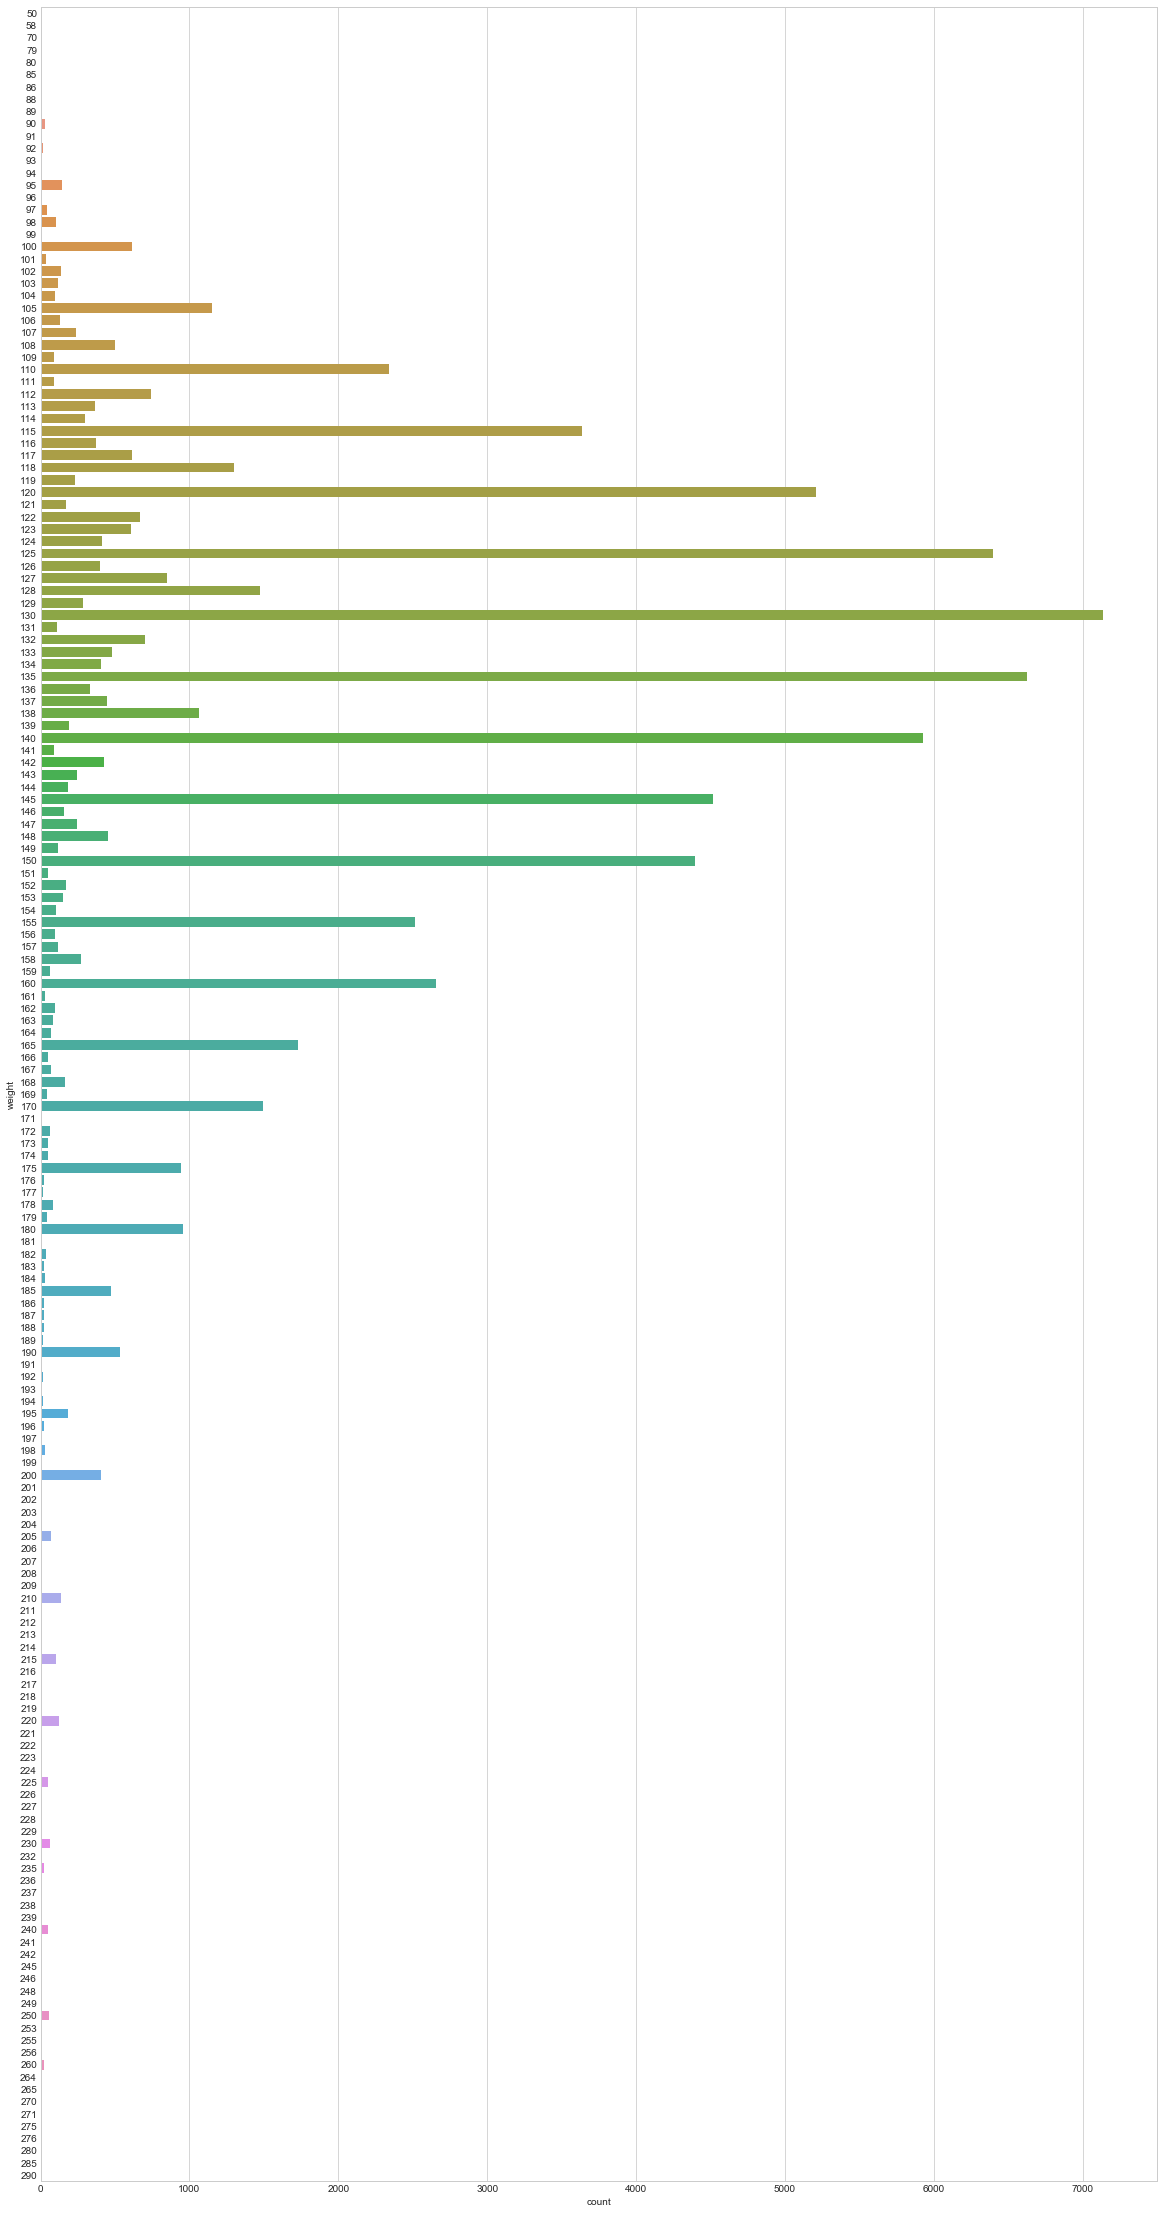

In [13]:
data_bin = pd.DataFrame()

data_bin['weight'] = reviews['weight']

plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize = (20, 40)) 
sns.countplot(y = "weight", data = data_bin);

In [14]:
dfWeight = reviews.loc[reviews['weight'] % 5 == 0 ]

def three_sigmaWeight(Ser1):
    weight = reviews['weight']
    rule = (Ser1.mean()-3*Ser1.std()>Ser1) | (Ser1.mean()+3*Ser1.std()< Ser1)
    index = np.arange(weight.shape[0])[rule]
    outrange = weight.iloc[index]
    return outrange

data_anomaly_weight = three_sigma(dfWeight['weight'])
print("Count:", data_anomaly_weight.count())
print("Min: ", data_anomaly_weight.min())
print("Max: ", data_anomaly_weight.max())
print("Anomalies:")
data_anomaly_weight

Count: 749
Min:  50
Max:  290
Anomalies:


109       210
188       220
278       210
795       205
1062      225
         ... 
145566    215
145643    210
145703    210
146022    215
146304    220
Name: weight, Length: 749, dtype: int64

#### Conclusion:
- Since a univariate outlier is defined by an observation with a variable that has an unusual value, the naive Bayes rules was applied to detect the outliers.
- The rules are applied to "age", "height", and "weight", since the rest fo the feartures such as "fit", "size" are better to be interpreted with other other features together 
- 3σ Rules was applied first, which theoretically should rejects 0.3% of the data. However, the function is returning more data than it should for "age" and "weight", which could be a result of data set not normally distributed.
- Boxplot was also applied to find the anomalies, which can be cross referenced with the results from 3σ rule.

Original Dataset Description: 
                age
count  79250.000000
mean      33.534864
std        7.604671
min       14.000000
25%       29.000000
50%       32.000000
75%       36.000000
max       77.000000
Data set from observation Description: 
                age
count  79199.000000
mean      33.515347
std        7.551606
min       16.000000
25%       29.000000
50%       32.000000
75%       36.000000
max       69.000000
Data set from boxplot Description: 
                age
count  72142.000000
mean      31.804122
std        5.041768
min       18.000000
25%       29.000000
50%       31.000000
75%       35.000000
max       44.000000


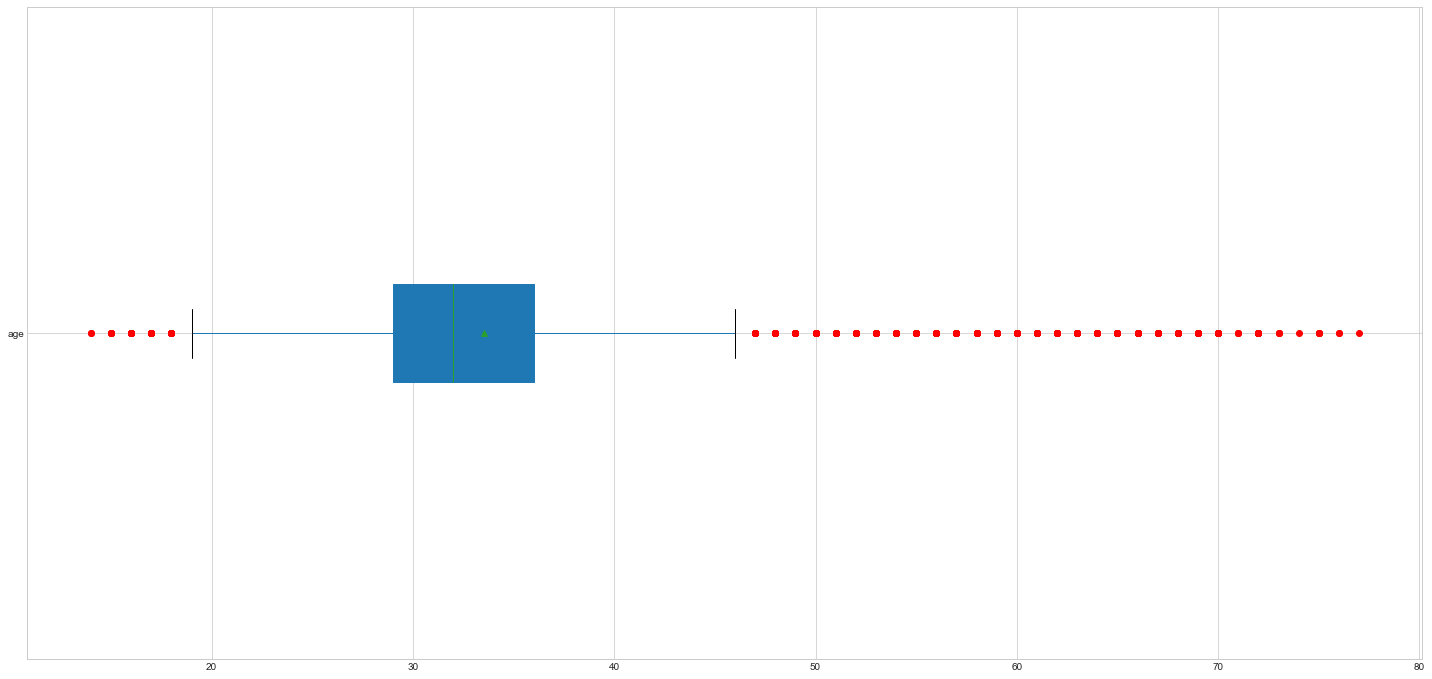

In [15]:
reviews_age = reviews[['age']]

statistics_origin = reviews_age.describe()
print("Original Dataset Description: ")
print(statistics_origin)

plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize = (25, 12)) 
reviews_age.boxplot(sym='r',vert=False,patch_artist=True,meanline=False,showmeans=True)

reviews_o = reviews_age[(reviews['age'] > 15)&(reviews['age'] < 70)]
statistics = reviews_o.describe()
print("Data set from observation Description: ")
print(statistics)

reviews_b = reviews_age[(reviews['age'] > 17)&(reviews['age'] < 45)]
statistics = reviews_b.describe()
print("Data set from boxplot Description: ")
print(statistics)

Original Dataset Description: 
             height
count  79250.000000
mean      65.213767
std        2.672110
min       54.000000
25%       63.000000
50%       65.000000
75%       67.000000
max       78.000000
Data set from observation Description: 
             height
count  79205.000000
mean      65.214141
std        2.661640
min       57.000000
25%       63.000000
50%       65.000000
75%       67.000000
max       74.000000
Data set from boxplot Description: 
             height
count  79138.000000
mean      65.206702
std        2.650456
min       57.000000
25%       63.000000
50%       65.000000
75%       67.000000
max       73.000000


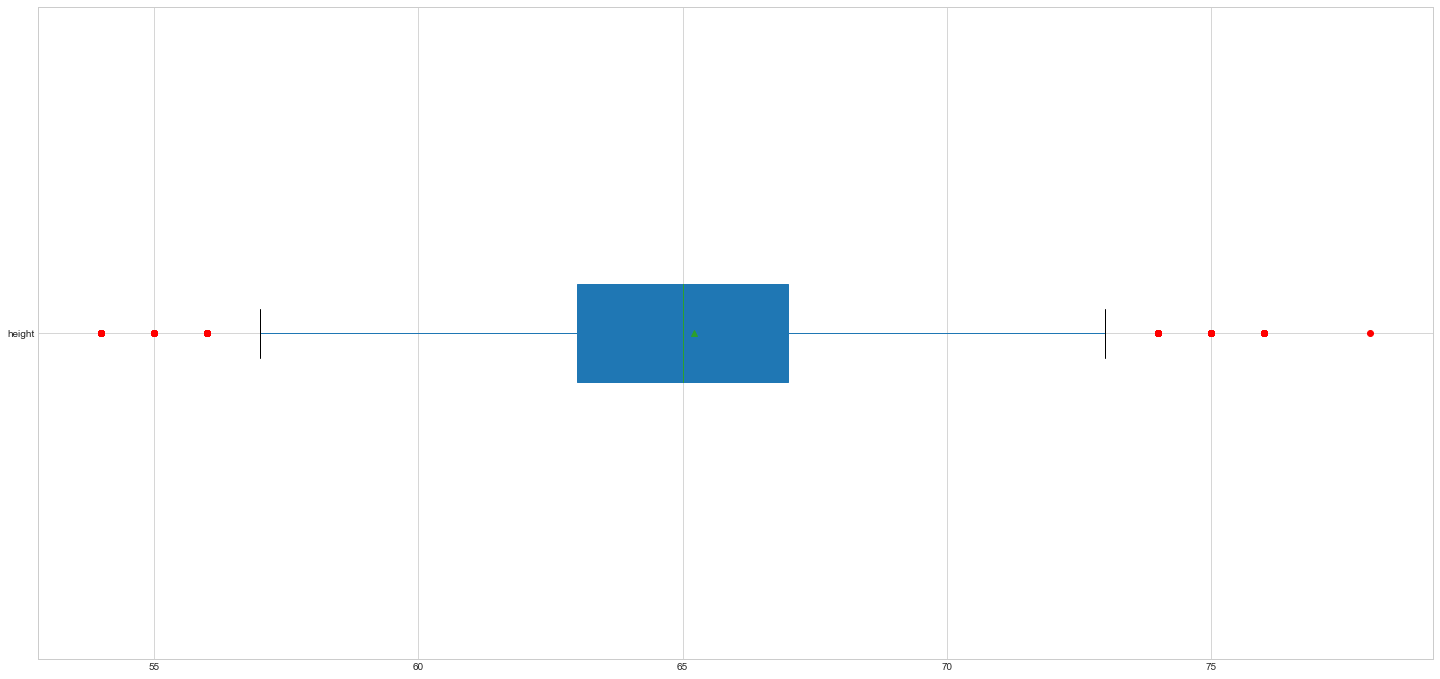

In [16]:
reviews_height = reviews[['height']]

statistics_origin = reviews_height.describe()
print("Original Dataset Description: ")
print(statistics_origin)

plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize = (25, 12)) 
reviews_height.boxplot(sym='r',vert=False,patch_artist=True,meanline=False,showmeans=True)

reviews_o = reviews_height[(reviews['height'] > 56)&(reviews['height'] < 75)]
statistics = reviews_o.describe()
print("Data set from observation Description: ")
print(statistics)

reviews_b = reviews_height[(reviews['height'] > 56)&(reviews['height'] < 74)]
statistics = reviews_b.describe()
print("Data set from boxplot Description: ")
print(statistics)

Original Dataset Description: 
             weight
count  79250.000000
mean     137.021981
std       21.423956
min       50.000000
25%      123.000000
50%      135.000000
75%      148.000000
max      290.000000
Data set from observation Description: 
             weight
count  79058.000000
mean     136.893964
std       20.893520
min       95.000000
25%      123.000000
50%      135.000000
75%      148.000000
max      249.000000
Data set from boxplot Description: 
             weight
count  76548.000000
mean     134.726511
std       17.506702
min       86.000000
25%      122.000000
50%      133.000000
75%      145.000000
max      184.000000


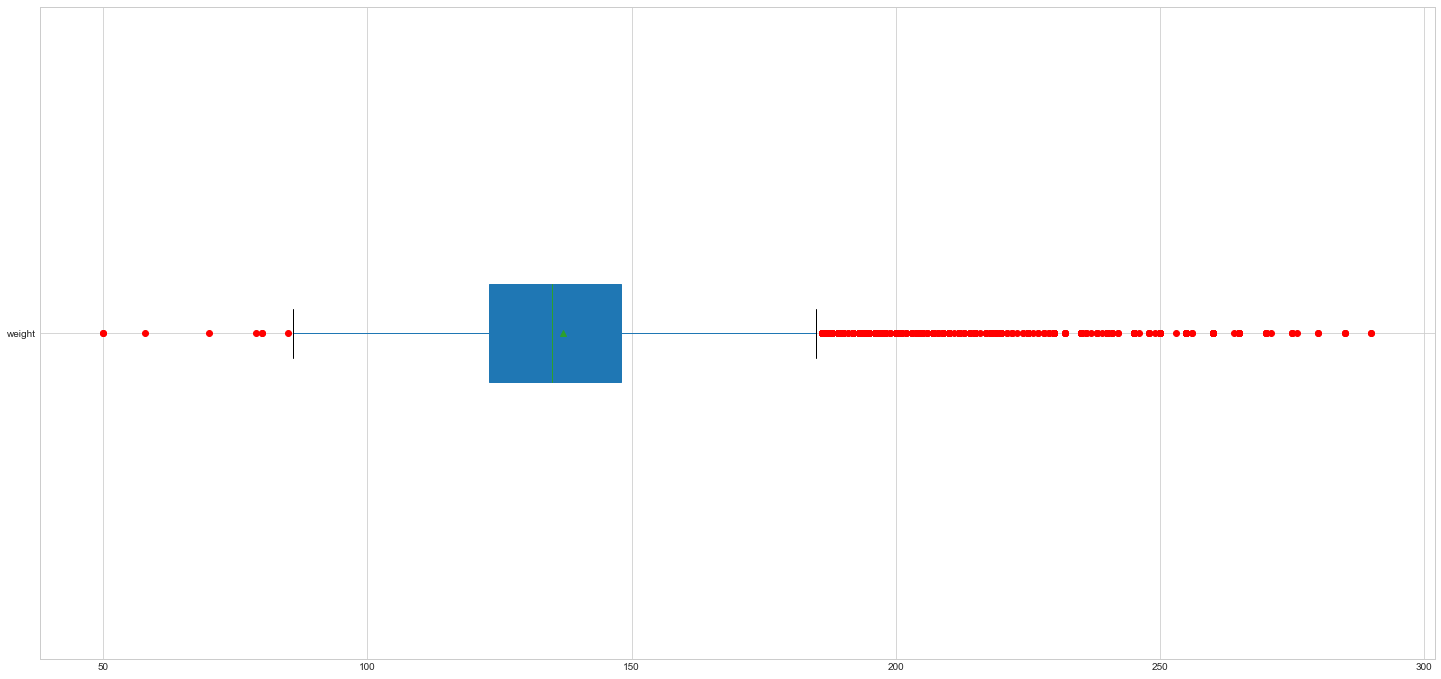

In [17]:
reviews_weight = reviews[['weight']]

statistics_origin = reviews_weight.describe()
print("Original Dataset Description: ")
print(statistics_origin)

plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize = (25, 12)) 
reviews_weight.boxplot(sym='r',vert=False,patch_artist=True,meanline=False,showmeans=True)

reviews_o = reviews_weight[(reviews['weight'] > 94)&(reviews['weight'] < 250)]
statistics = reviews_o.describe()
print("Data set from observation Description: ")
print(statistics)

reviews_b = reviews_weight[(reviews['weight'] > 85)&(reviews['weight'] < 185)]
statistics = reviews_b.describe()
print("Data set from boxplot Description: ")
print(statistics)

#### Conclusion
- Applying boxplot would reject more data points than the 3σ rule would do. 
- Boxplot is highly symmetric for the graph of "height", which once again could be the result of "height" being normally distributed.
- There are two ways to interpret the data: 
    - The first one could be catagorized as "fake data", which could tell by obsserving the dataset.This type of data is semantically meaningless. Data points such as age of 0 and age of 117 falls into this catagory.
    - The second one could be catagorized as "scarce data". They happen at a less frequency when compared to other data and is thus rejected by the algorithms. This type of data is less helpful when applying machine learning. Data points such as height of 78 inch and 54 inch would fall into this category.
- It leaves up to the data interpreter to decide how they want to look at the data
    

### Ⅱ. Multivariate
- Algorithm applied: Isolation forest

In [18]:
from sklearn.ensemble import IsolationForest

In [19]:
rng = np.random.RandomState(42)
ilf = IsolationForest(n_estimators = 100,
                      max_samples = 256,
                      behaviour = "new",
                      random_state = rng,
                      contamination = 0.0003
                      
    )
X_cols = ["category","rented_for"]
ilf.fit(reviews[X_cols])
pred = ilf.predict(reviews[X_cols])
 
data_pred = reviews
data_pred["pred"] = pred

data_pred.loc[data_pred["pred"] == -1]

,age,body_type,category,fit,height,item_id,rating,rented_for,review_date,size,user_id,weight,bust_volume,bust_height,pred
496,28,3,49,large,65.0,2337876,10,0,2016-01-05,12,502927,170,710,4,-1
12190,30,3,52,fit,68.0,2565135,8,0,2015-03-04,8,813562,125,390,3,-1
26603,31,1,52,fit,69.0,2565135,10,0,2014-07-02,8,863502,128,480,2,-1
30730,36,1,52,fit,69.0,2565135,8,0,2015-03-25,8,451377,133,590,4,-1
42267,46,1,42,large,71.0,545632,8,0,2014-05-01,8,467479,125,390,1,-1
43187,36,4,42,fit,68.0,545632,8,0,2016-06-07,14,760444,145,390,2,-1
43516,35,1,52,small,64.0,2565135,8,0,2014-11-05,4,562734,123,390,3,-1
45820,52,1,42,fit,66.0,545632,10,0,2015-04-20,4,743979,120,480,3,-1
51042,36,4,49,fit,61.0,2337876,10,8,2016-01-14,1,212562,120,310,2,-1
53691,44,3,52,fit,61.0,2565135,8,0,2015-03-22,4,711580,105,310,1,-1


In [20]:
X_cols = ["height","weight","size"]
ilf.fit(reviews[X_cols])
pred = ilf.predict(reviews[X_cols])
 
data_pred = reviews
data_pred["pred"] = pred

data_pred.loc[data_pred["pred"] == -1]

,age,body_type,category,fit,height,item_id,rating,rented_for,review_date,size,user_id,weight,bust_volume,bust_height,pred
19218,31,3,16,small,70.0,136110,10,3,2014-05-18,57,322795,260,710,3,-1
24910,39,4,16,large,70.0,1542250,10,3,2015-03-10,57,52166,260,1000,3,-1
27610,39,4,45,fit,70.0,144727,6,4,2016-02-08,51,52166,260,1000,3,-1
32043,40,0,45,large,60.0,144727,8,2,2014-05-10,51,799988,237,850,4,-1
37011,33,4,20,fit,72.0,142179,10,7,2017-03-27,44,482373,248,850,4,-1
38855,50,3,16,fit,70.0,865225,10,2,2015-10-08,51,108088,240,850,4,-1
40886,45,3,20,fit,70.0,1446293,10,0,2017-08-25,51,489853,290,850,4,-1
53400,25,0,16,fit,71.0,1920477,8,2,2015-04-09,51,596569,250,710,4,-1
62984,28,0,16,fit,60.0,467817,8,7,2017-09-05,51,383515,250,1180,6,-1
67344,39,4,16,small,70.0,135459,8,4,2013-10-26,51,52166,260,1000,3,-1


In [21]:
X_cols = ["bust_volume","bust_height","size"]
ilf.fit(reviews[X_cols])
pred = ilf.predict(reviews[X_cols])
 
data_pred = reviews
data_pred["pred"] = pred

data_pred.loc[data_pred["pred"] == -1]

,age,body_type,category,fit,height,item_id,rating,rented_for,review_date,size,user_id,weight,bust_volume,bust_height,pred
2856,28,2,20,fit,64.0,1241304,10,3,2017-06-08,51,193803,270,1370,6,-1
8531,39,3,20,fit,65.0,1501987,10,2,2017-11-21,57,585229,280,1810,6,-1
17239,33,0,20,fit,64.0,1446293,8,7,2016-04-23,51,931022,220,1580,6,-1
25807,38,3,45,large,64.0,144727,10,7,2016-09-25,39,387255,215,1810,10,-1
27063,49,2,20,fit,69.0,834814,8,2,2017-05-04,40,140752,220,1810,8,-1
40174,28,2,16,fit,67.0,130259,10,4,2017-11-27,45,832890,240,1580,8,-1
44062,33,3,20,fit,66.0,834814,10,4,2017-12-21,51,190475,250,1580,8,-1
46874,35,3,20,fit,68.0,125465,10,2,2014-10-03,51,199631,207,1810,7,-1
53401,36,2,16,small,65.0,1515649,8,4,2018-01-02,54,543250,265,1810,6,-1
59561,40,3,20,small,63.0,1240309,10,7,2017-01-06,51,200920,220,1370,6,-1


In [53]:
X_cols = ["body_type", "weight", "size", 'height', 'bust_volume', 'bust_height']
ilf = IsolationForest(n_estimators = 100,
                      max_samples = 256,
                      behaviour = "new",
                      random_state = rng,
                      contamination = 0.1
                      
    )
item_id = 126335
largest_item = reviews.loc[reviews['item_id'] == item_id]
fit_data = largest_item.loc[largest_item['fit'] == 'fit']
pred = ilf.fit_predict(fit_data[X_cols])
 
data_pred = fit_data
data_pred["pred"] = pred

size_28 = data_pred.loc[data_pred['size'] == 28]
size_28.loc[size_28["pred"] == -1]

c:\users\melody yu\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,age,body_type,category,fit,height,item_id,rating,rented_for,review_date,size,user_id,weight,bust_volume,bust_height,pred
4611,35,0,16,fit,67.0,126335,8,6,2012-10-16,28,64706,190,710,3,-1
8417,34,3,16,fit,60.0,126335,10,3,2017-06-11,28,598450,175,710,6,-1
19424,34,2,16,fit,67.0,126335,8,4,2014-10-14,28,984453,212,1370,7,-1
28434,34,0,16,fit,65.0,126335,8,6,2013-05-18,28,514596,200,1370,8,-1
42001,41,3,16,fit,65.0,126335,10,4,2014-12-12,28,785417,165,1000,6,-1
50785,34,2,16,fit,70.0,126335,10,2,2013-02-04,28,396730,170,1000,5,-1
58995,33,5,16,fit,61.0,126335,8,2,2014-05-12,28,655944,170,1000,5,-1
62591,32,0,16,fit,68.0,126335,10,7,2014-10-07,28,255425,190,850,4,-1
73871,25,3,16,fit,69.0,126335,10,2,2014-11-17,28,508828,200,1000,7,-1
77061,31,3,16,fit,72.0,126335,10,2,2014-08-18,28,29751,209,590,2,-1


In [54]:
def convertAnomaly(s):
    if s == 1:
        return "Good"
    return "Anomaly"

size_28['pred'] = size_28.pred.apply(convertAnomaly)
size_28.head()

c:\users\melody yu\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,age,body_type,category,fit,height,item_id,rating,rented_for,review_date,size,user_id,weight,bust_volume,bust_height,pred
1791,33,5,16,fit,63.0,126335,8,7,2014-09-14,28,30937,185,710,3,Good
4611,35,0,16,fit,67.0,126335,8,6,2012-10-16,28,64706,190,710,3,Anomaly
8417,34,3,16,fit,60.0,126335,10,3,2017-06-11,28,598450,175,710,6,Anomaly
9381,45,3,16,fit,69.0,126335,10,6,2014-05-19,28,362635,195,480,3,Good
11231,39,4,16,fit,60.0,126335,8,2,2012-09-06,28,148459,180,850,4,Good


In [ ]:
# sns.pairplot(size_28, hue='pred', vars=X_cols.remove('size'))
X_cols.remove('size')

In [23]:
# from sklearn import preprocessing
# le_category = preprocessing.LabelEncoder()
# reviews['fit']  = le_category.fit_transform(reviews['fit'])
# le_category_mapping = dict(zip(le_category.classes_, le_category.transform(le_category.classes_)))
# category_encoding = pd.DataFrame.from_dict(le_category_mapping, orient='index').rename(columns={0: 'encoding'})
# category_encoding.index.name = 'labels'
# category_encoding.head()

In [24]:
# X_cols = ["fit", "weight", "size"]
# ilf.fit(reviews[X_cols])
# pred = ilf.predict(reviews[X_cols])
 
# data_pred = reviews
# data_pred["pred"] = pred

# data_pred.loc[data_pred["pred"] == -1]

#### Conclusion
- The contamination I picked is 0.003, which rejects about 0.3% of the data.
- Considering the rationale behind the Isolation Forest, the data it produced would fall into "scarce data". In this case, since the rejection rate is low, only the data that happen at very loe frequency would be rejected. 
- For example, the conbination of a person that weighs 250 lbs and ordered a size 51 dress would be rejected. 
- It is hard to tell that the data is rejected because the low frequency of a person weighing 250 lbs or the person weighing 250 lbs should have ordered a different size, considering the isolation forest will reject anything that happens less frequently.